# PRCP-1016-HeartDieseasePred


### PTID-CDS-FEB-24-1819

# Business Case : 


### To create a reliable model predicting potential Heart Diseases in people

# Task 1:-Prepare a complete data analysis report on the given data.

In [106]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
# # loading the data
val=pd.read_csv(r"C:\Users\satka\Downloads\PRCP-1016-HeartDieseasePred\Data\values.csv")
print (val)

    patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1

In [108]:
lab=pd.read_csv(r"C:\Users\satka\Downloads\PRCP-1016-HeartDieseasePred\Data\labels.csv")
print (lab)

    patient_id  heart_disease_present
0       0z64un                      0
1       ryoo3j                      0
2       yt1s1x                      1
3       l2xjde                      1
4       oyt4ek                      0
..         ...                    ...
175     5qfar3                      1
176     2s2b1f                      1
177     nsd00i                      1
178     0xw93k                      0
179     2nx10r                      0

[180 rows x 2 columns]


In [109]:
# merge the both table using common column 'patient_id'
df=pd.merge(val,lab,on='patient_id')

In [110]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Domain Analysis

There are two datasets to be utilized in this project; values and labels. The values dataset consists of 14 columns while that of label contains 2 columns. Both dataset have the patient_id column with the same values as a unique and random identifier. Both data sets will be merged as one. The presence of heart disease column is the label .it contains 2 values(datatype: binary).

The remaining 13 features are described in the section below.

* slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* resting_blood_pressure (type: int): resting blood pressure
* chest_pain_type (type: int): chest pain type (4 values)
* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
* oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* sex (type: binary): 0: female, 1: male
* age (type: int): age in years
* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

# Basic Checks

In [111]:
df.shape

(180, 15)

In [112]:
df.keys()

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [113]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [114]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [116]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [117]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [118]:
df.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [119]:
df['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

 # Exploratory Data Analysis

In [120]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# UNIVARIATE ANALYSIS

<Axes: xlabel='chest_pain_type', ylabel='count'>

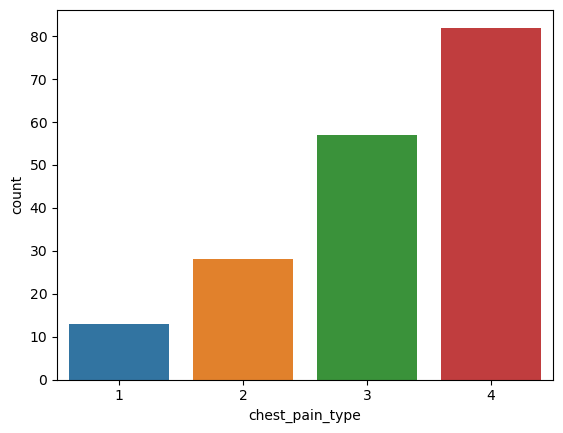

In [121]:
sns.countplot(x='chest_pain_type',data=df)

In [122]:
df.chest_pain_type.value_counts()

chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

<Axes: xlabel='num_major_vessels', ylabel='count'>

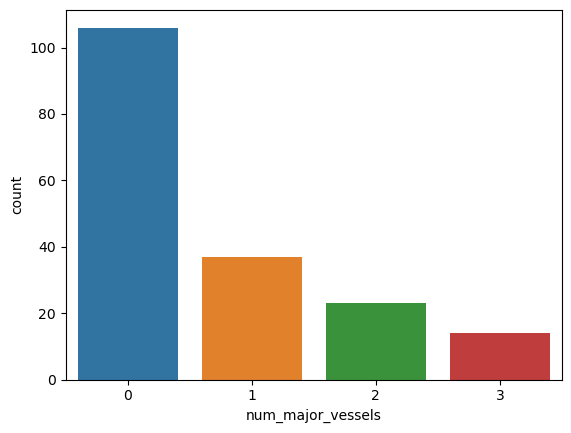

In [123]:
sns.countplot(x='num_major_vessels',data=df)

In [124]:
df.num_major_vessels.value_counts()

num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

<Axes: xlabel='resting_ekg_results', ylabel='count'>

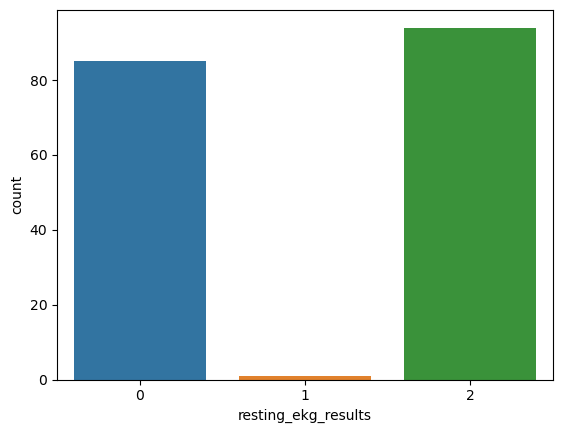

In [125]:
sns.countplot(x='resting_ekg_results',data=df)

In [126]:
df.resting_ekg_results.value_counts()

resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64

<Axes: xlabel='resting_blood_pressure', ylabel='Count'>

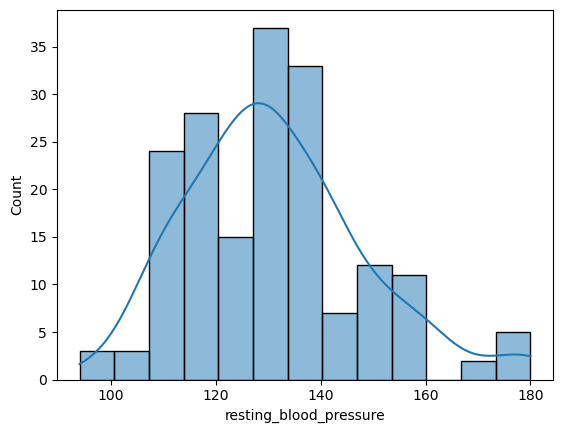

In [127]:
sns.histplot(x=df.resting_blood_pressure,kde=True)

<Axes: ylabel='Density'>

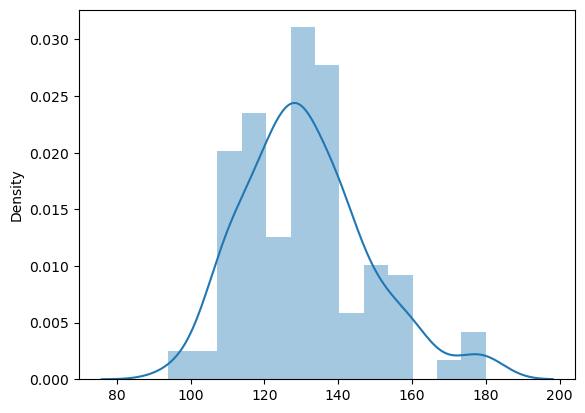

In [128]:
sns.distplot(x=df.resting_blood_pressure,kde=True)

# Bivariate analysis

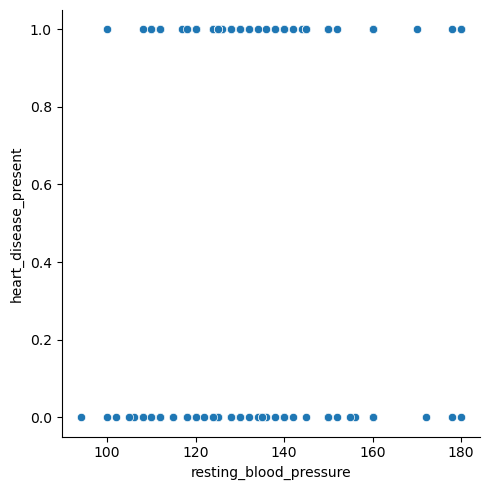

In [26]:
sns.relplot(x=df.resting_blood_pressure,y=df.heart_disease_present)

# Multivariate analysis


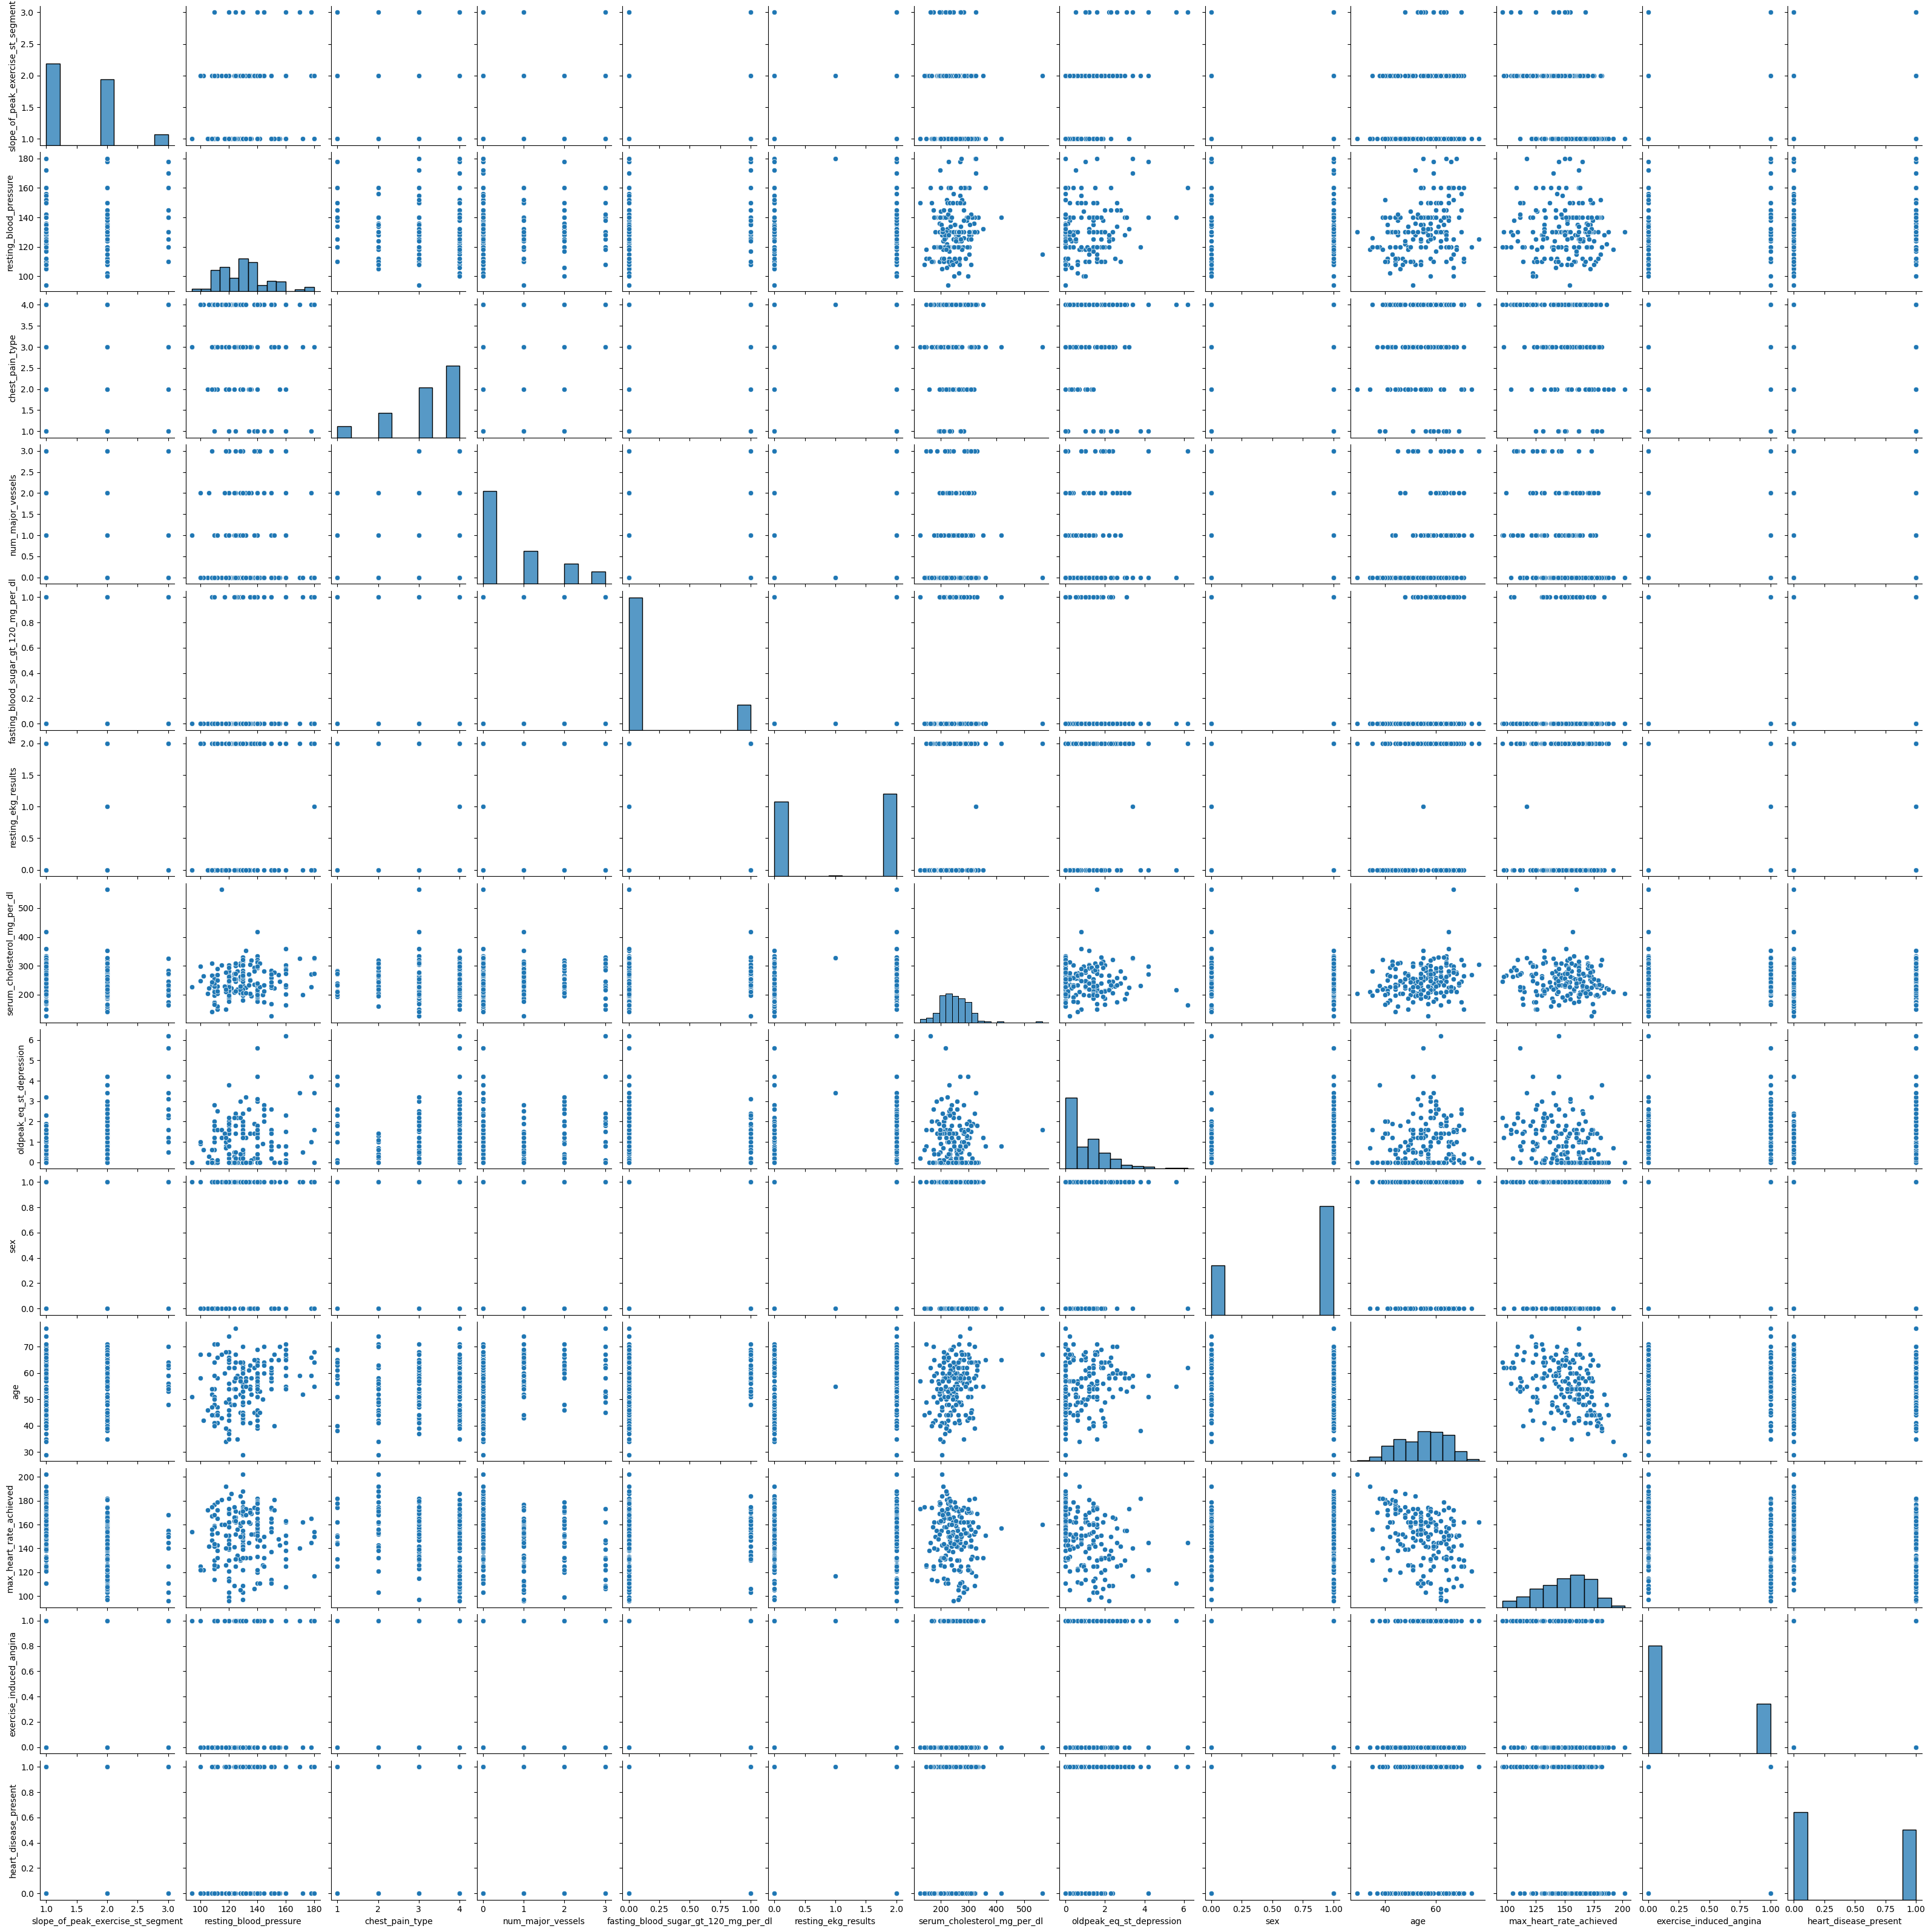

In [27]:
sns.pairplot(df)

# Data Preprocessing & Feature Engg

In [28]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [29]:
# handalinhg the missing value
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

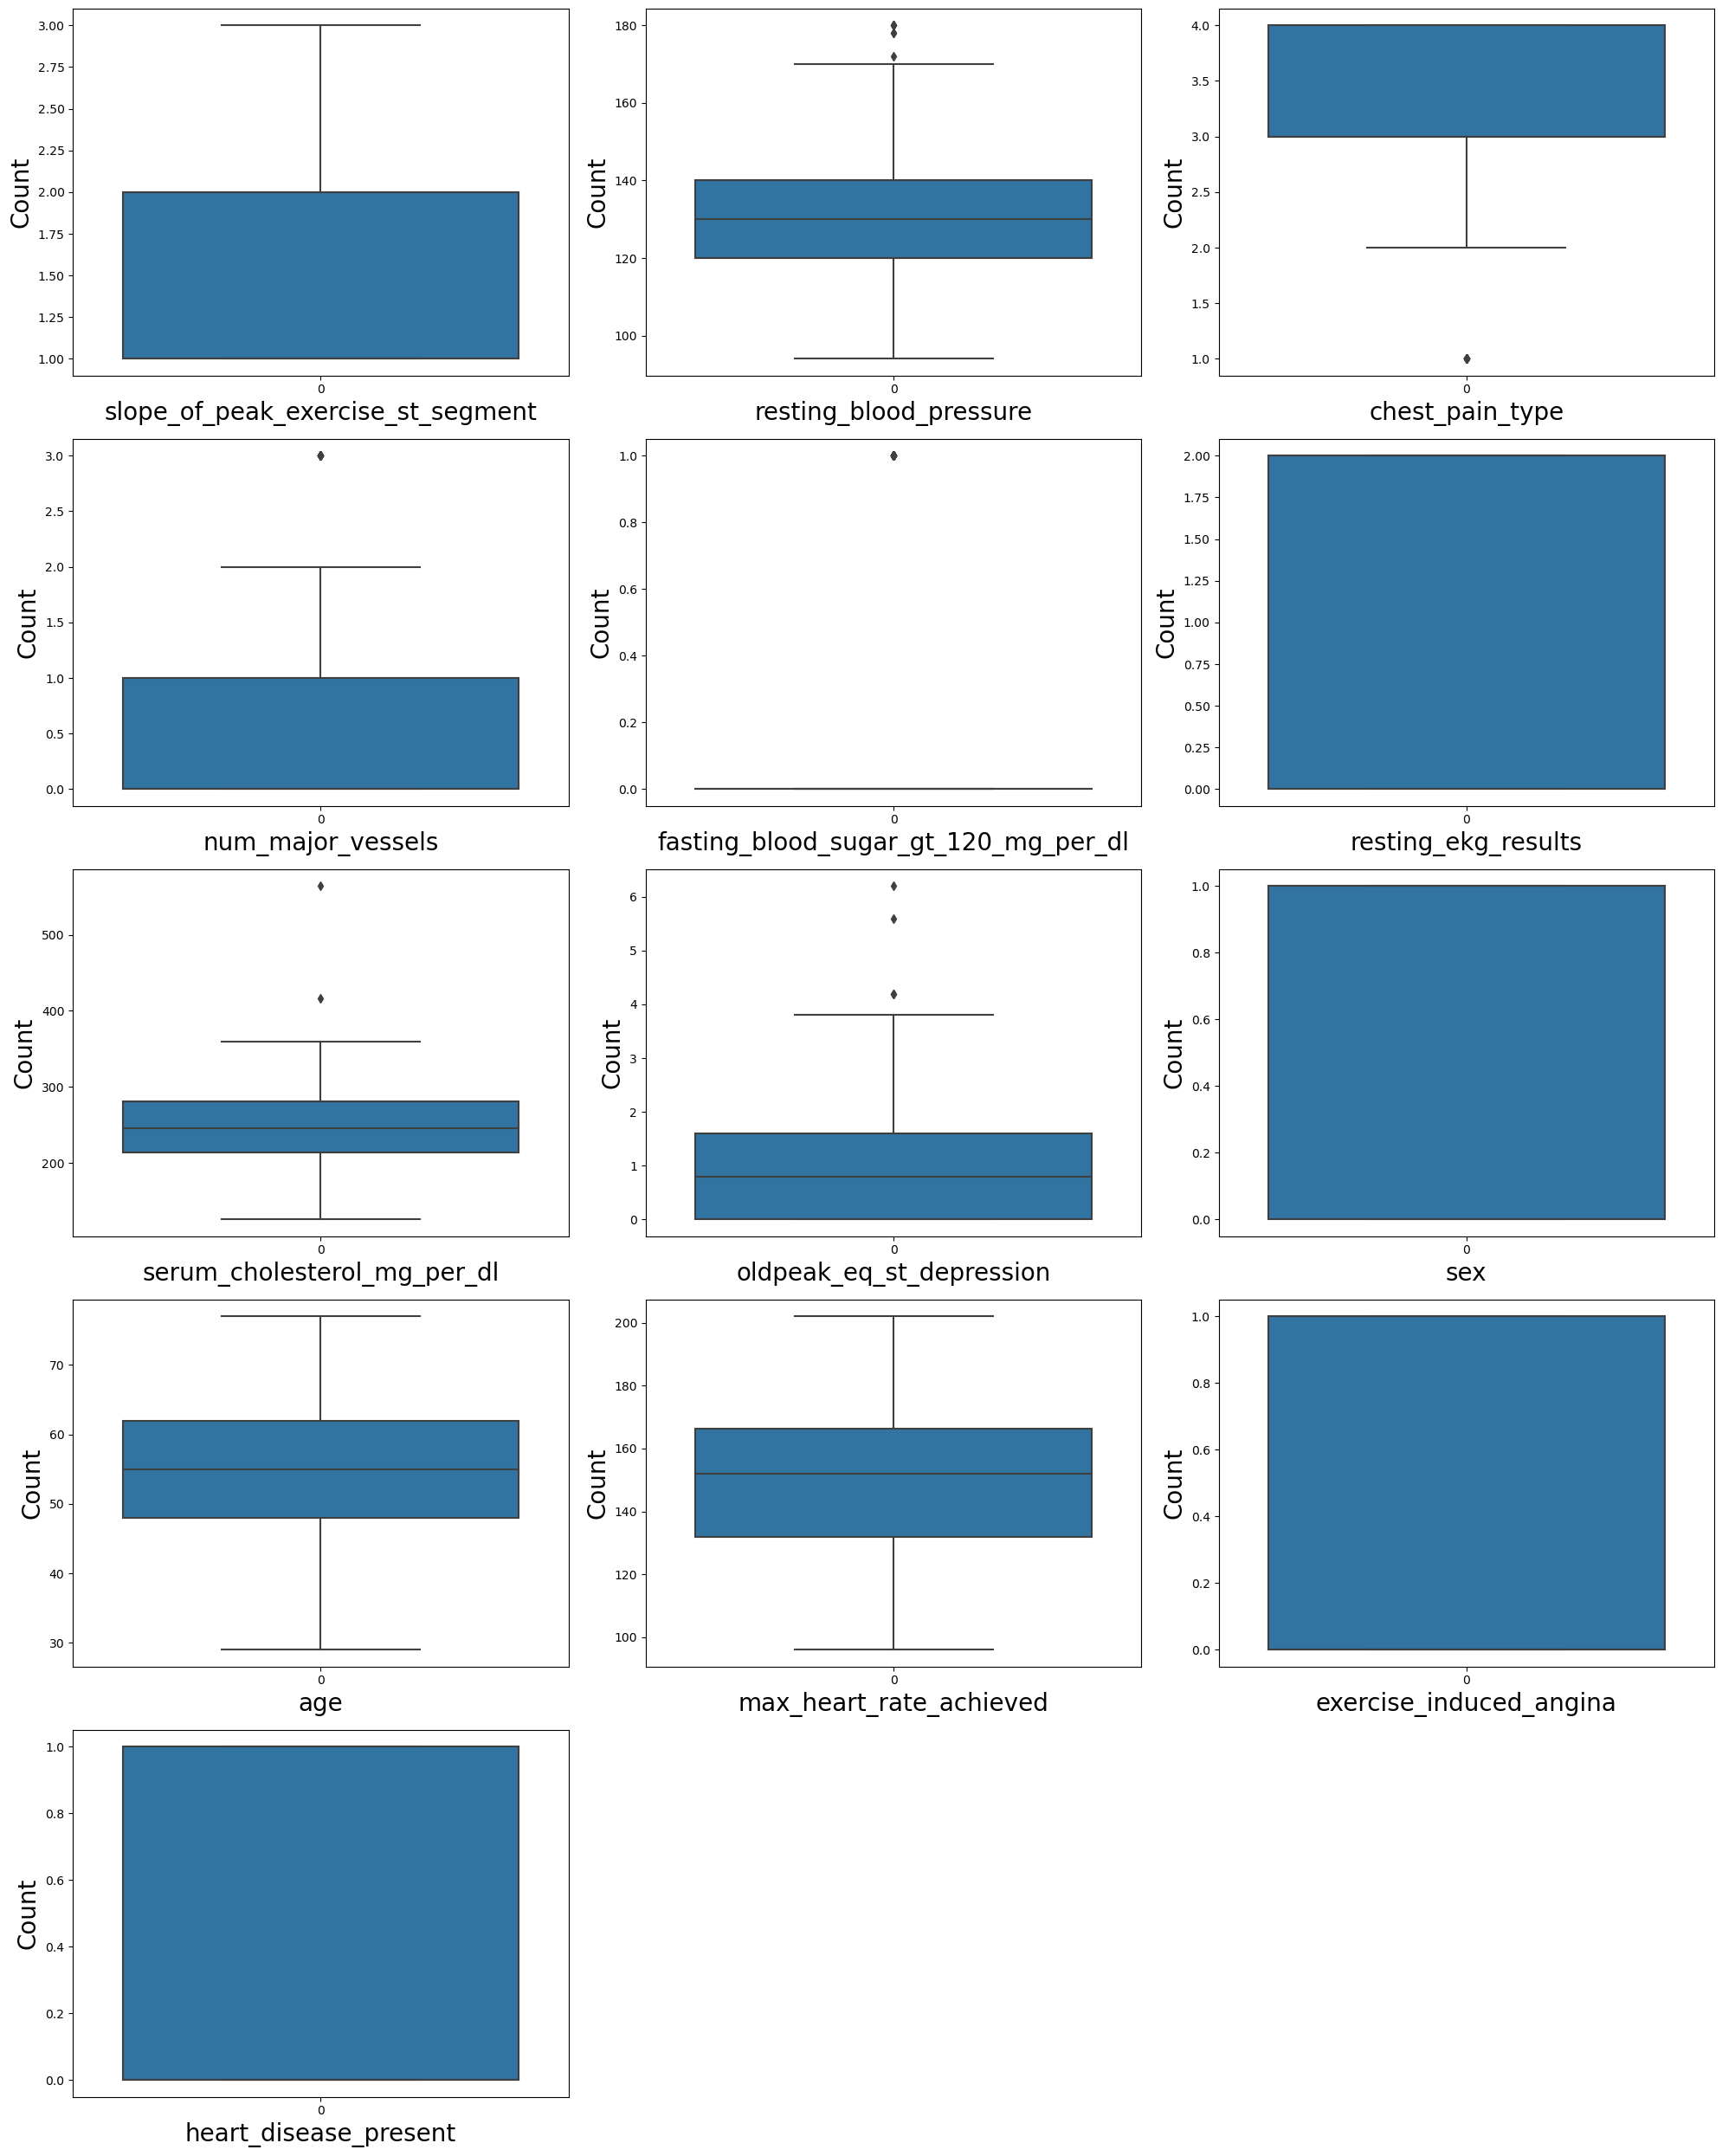

In [30]:
## Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
columns_to_skip = ['patient_id','thal']

for column in df:
    if column not in columns_to_skip:
        if plotnumber<=14:
            x=plt.subplot(5,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
            plt.ylabel('Count',fontsize=20)
        plotnumber+=1
plt.tight_layout()

# Handling outliers

In [31]:
q1=df['resting_blood_pressure'].quantile(0.25)
q3=df['resting_blood_pressure'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)


120.0
140.0
20.0
90.0
170.0


In [32]:
df.loc[df['resting_blood_pressure'] > 170,'resting_blood_pressure'] = np.median(df['resting_blood_pressure'])

In [33]:
q1=df['chest_pain_type'].quantile(0.25)
q3=df['chest_pain_type'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)

3.0
4.0
1.0
1.5
5.5


In [34]:
df.loc[df['chest_pain_type'] <1.5 ,'chest_pain_type'] = np.median(df['chest_pain_type'])

In [35]:
q1=df['serum_cholesterol_mg_per_dl'].quantile(0.25)
q3=df['serum_cholesterol_mg_per_dl'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)

213.75
281.25
67.5
112.5
382.5


In [36]:
df.loc[df['serum_cholesterol_mg_per_dl'] > 382.5,'serum_cholesterol_mg_per_dl'] = np.median(df['serum_cholesterol_mg_per_dl'])

In [37]:
q1=df['oldpeak_eq_st_depression'].quantile(0.25)
q3=df['oldpeak_eq_st_depression'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
print(q1)
print(q3)
print(IQR)
print(LL)
print(UL)

0.0
1.6
1.6
-2.4000000000000004
4.0


In [38]:
df.loc[df['oldpeak_eq_st_depression'] > 4.0,'oldpeak_eq_st_depression'] = np.median(df['oldpeak_eq_st_depression'])

In [39]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,129.711111,3.300000,0.694444,0.161111,1.050000,246.488889,0.915556,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,14.611731,0.723894,0.969347,0.368659,0.998742,45.398452,0.931439,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,2.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.250000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,277.000000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,170.000000,4.000000,3.000000,1.000000,2.000000,360.000000,3.800000,1.000000,77.000000,202.000000,1.000000,1.000000


In [40]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,130,3,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2s2b1f,2,normal,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255.0,0.0,1,48,175,0,0


In [41]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['thal']= label_encoder.fit_transform(df['thal']) 
 
df['thal'].unique()


array([1, 2, 0])

In [42]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,oyt4ek,3,2,130,3,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,2,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2s2b1f,2,1,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,nsd00i,2,2,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,0xw93k,1,1,124,3,2,1,0,255.0,0.0,1,48,175,0,0


In [43]:
df.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,129.711111,3.300000,0.694444,0.161111,1.050000,246.488889,0.915556,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,14.611731,0.723894,0.969347,0.368659,0.998742,45.398452,0.931439,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,2.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.250000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,277.000000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,170.000000,4.000000,3.000000,1.000000,2.000000,360.000000,3.800000,1.000000,77.000000,202.000000,1.000000,1.000000


##  Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1=['patient_id']
data=sc.fit_transform(df.drop(d1,axis=1))

In [45]:
print(data)

[[0.         0.5        0.44736842 ... 0.69811321 0.         0.        ]
 [0.5        0.5        0.21052632 ... 0.58490566 0.         0.        ]
 [0.         0.5        0.40789474 ... 0.62264151 1.         1.        ]
 ...
 [0.5        1.         0.40789474 ... 0.33018868 1.         1.        ]
 [0.         0.5        0.39473684 ... 0.74528302 0.         0.        ]
 [0.         0.5        0.86842105 ... 0.63207547 0.         0.        ]]


In [46]:
data1=pd.DataFrame(data,columns=['slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'])

In [47]:
data1

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0.5,0.447368,0.0,0.000000,0.0,1.0,0.777778,0.000000,1.0,0.333333,0.698113,0.0,0.0
1,0.5,0.5,0.210526,0.5,0.000000,0.0,0.0,0.376068,0.421053,0.0,0.520833,0.584906,0.0,0.0
2,0.0,0.5,0.407895,1.0,1.000000,0.0,1.0,0.760684,0.000000,1.0,1.000000,0.622642,1.0,1.0
3,0.0,1.0,0.763158,1.0,0.000000,0.0,0.0,0.414530,0.000000,1.0,0.229167,0.801887,0.0,1.0
4,1.0,1.0,0.473684,0.5,0.000000,0.0,1.0,0.615385,0.210526,1.0,0.625000,0.462264,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.407895,1.0,0.666667,1.0,0.0,0.547009,0.052632,1.0,0.791667,0.632075,0.0,1.0
176,0.5,0.5,0.473684,1.0,0.000000,0.0,0.5,0.858974,0.894737,0.0,0.541667,0.198113,1.0,1.0
177,0.5,1.0,0.407895,0.5,0.000000,0.0,0.0,0.782051,0.473684,1.0,0.729167,0.330189,1.0,1.0
178,0.0,0.5,0.394737,0.5,0.666667,1.0,0.0,0.551282,0.000000,1.0,0.395833,0.745283,0.0,0.0


In [129]:
# checking correlation
corr_data=data1[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age']]

<Axes: >

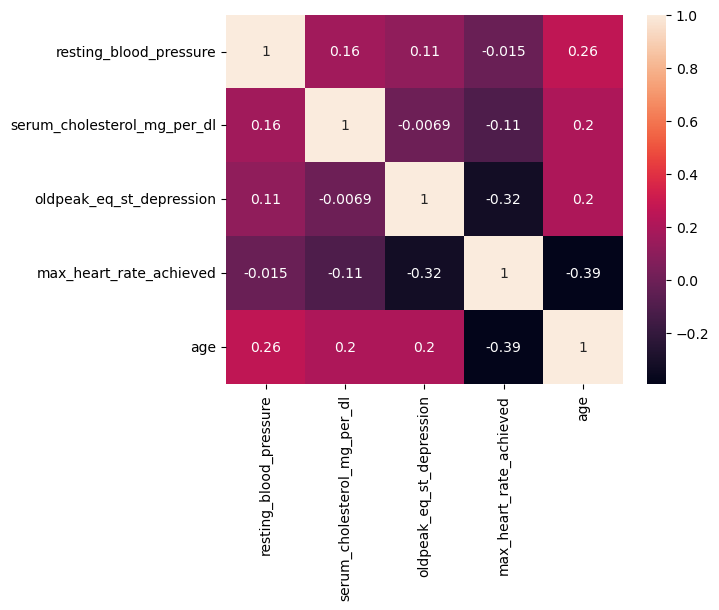

In [49]:
sns.heatmap(corr_data.corr(),annot=True)

## There is no relationship among the numerical data 

In [50]:
tc=data1.corr()
tc

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.061536,0.228216,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.062529,0.301500,0.174107,-0.070225,-0.052171,0.023872,0.189707,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.061536,-0.062529,1.000000,0.042570,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.228216,0.301500,0.042570,1.000000,0.290593,-0.035587,0.110498,0.067929,0.230834,0.179537,0.175435,-0.369755,0.445038,0.480122
num_major_vessels,0.076832,0.174107,0.090367,0.290593,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.096842,-0.035587,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.113544,0.110498,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.047307,0.023872,0.163281,0.067929,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak_eq_st_depression,0.535583,0.189707,0.110505,0.230834,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253
sex,0.093340,0.265420,-0.016618,0.179537,0.073107,0.066010,0.045786,-0.087374,0.121071,1.000000,-0.148997,-0.053960,0.251096,0.335421


<Axes: >

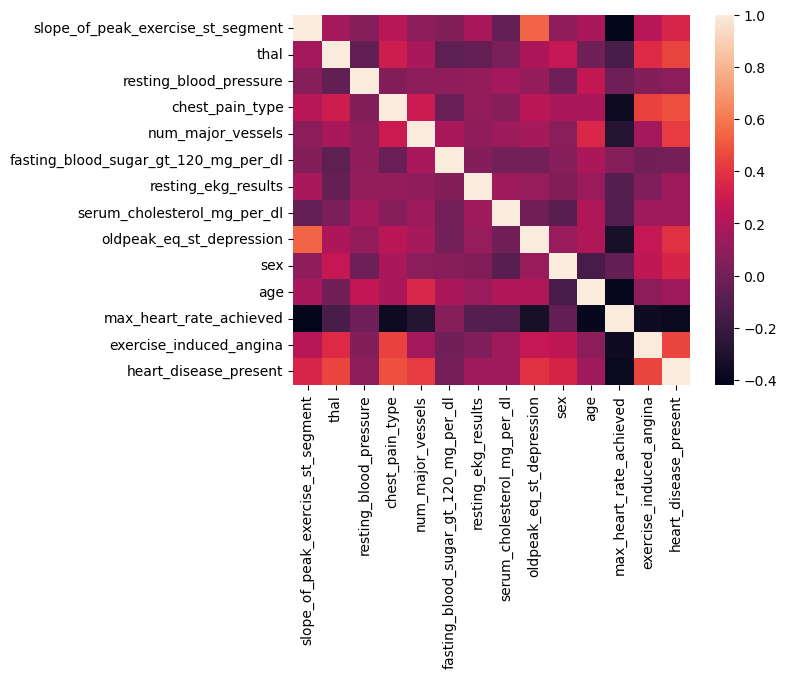

In [51]:
sns.heatmap(data1.corr())


* There is a  good positive relationship between old peak eq st depression and slope of peak exercise segment
* There is a fair negative relationship between the max heart rate achieved and slope of peak exercise segment
* There is also a fair negative relationship between the max heart rate achieved and exercise induced angina,chest pain type, number of blood vessels, old peak eq st depression , age and ultimately the presence of a heart disease
* There is a fair relationship between exercise induced angina and thal, chest pain type ,max heart rate and presence of a heart disease
* No relationship was found between Fasting blood Sugar and presence of a heart disease,Fasting blood sugar and exercise induced angin and sex and Fasting blood sugar

In [52]:
data1.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.275000,0.683333,0.469883,0.650000,0.231481,0.161111,0.525000,0.514910,0.240936,0.688889,0.537731,0.504560,0.316667,0.444444
std,0.309419,0.284124,0.192260,0.361947,0.323116,0.368659,0.499371,0.194010,0.245115,0.464239,0.194474,0.208146,0.466474,0.498290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.342105,0.500000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.395833,0.339623,0.000000,0.000000
50%,0.000000,0.500000,0.473684,0.500000,0.000000,0.000000,1.000000,0.509615,0.210526,1.000000,0.541667,0.528302,0.000000,0.000000
75%,0.500000,1.000000,0.605263,1.000000,0.333333,0.000000,1.000000,0.645299,0.421053,1.000000,0.687500,0.662736,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Creation 

In [53]:
X=data1.loc[:,['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved','exercise_induced_angina']]




y=data1.heart_disease_present

### Model Selection

### Spliting the data into train and test

In [54]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=10)

In [55]:
## balancing the data
data1.heart_disease_present.value_counts()

heart_disease_present
0.0    100
1.0     80
Name: count, dtype: int64

## Task 2 :- Create a model predicting potential Heart Disease in people using Machcine Learning Algorithm

## 1. Support Vector Machine Algorithm

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [59]:
from collections import Counter

print("Actual Classes",Counter(y_train))


print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0.0: 72, 1.0: 63})
SMOTE Classes Counter({1.0: 72, 0.0: 72})


In [60]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [61]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [62]:
y_hat 

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.])

In [63]:
y_test

150    0.0
87     1.0
68     0.0
151    0.0
120    1.0
72     0.0
60     0.0
10     0.0
138    0.0
109    1.0
49     0.0
20     0.0
78     1.0
59     1.0
67     0.0
116    0.0
55     0.0
47     0.0
19     1.0
101    0.0
121    0.0
1      0.0
144    1.0
70     0.0
52     1.0
69     1.0
83     1.0
97     0.0
76     0.0
56     1.0
111    0.0
129    1.0
114    0.0
174    0.0
170    1.0
7      1.0
26     0.0
39     1.0
179    0.0
46     0.0
61     1.0
24     0.0
58     0.0
128    1.0
21     0.0
Name: heart_disease_present, dtype: float64

### EVALUATION OF MODEL

In [64]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
print("Accuracy for SVM:",acc)

Accuracy for SVM: 0.9111111111111111


In [65]:
print("Classification Report for SVM:")
print(classification_report(y_test,y_hat))

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        28
         1.0       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [66]:
#confusion matrix
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0.0,1.0
heart_disease_present,,
0.0,26,2
1.0,2,15


In [67]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8823529411764706

### Cross validation Techniques for Support Vector Machine Algorithm

In [68]:
## checking cross validation score to check the avg performance of our model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.8        0.71428571 0.71428571 0.93333333 0.93333333 1.
 0.77777778 0.75       0.70588235 0.77777778]
Cross validation Score: 0.8106676003734827
Std : 0.10072598569295295


In [69]:
scores.mean()

0.8106676003734827

In [70]:
from sklearn.model_selection import StratifiedKFold
sk_fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=34)
scores = cross_val_score(svclassifier,X,y,cv=sk_fold,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.71428571 0.7        0.71428571 0.58823529 0.82352941 0.85714286
 0.85714286 1.         0.875      0.8       ]
Cross validation Score: 0.7929621848739495
Std : 0.11034133643103397


### Hyperparameter Tuning for Support Vector Machine Algorithm

In [71]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [72]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

{'C': 70, 'gamma': 0.001, 'random_state': 1}


In [73]:
# clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=70, gamma=0.001,random_state=1) ##0.1

In [74]:
clf.fit(X_smote, y_smote)

SVC(C=70, gamma=0.001, random_state=1)

In [75]:
clf.score(X_smote, y_smote)

0.8194444444444444

In [76]:
y_clf=clf.predict(X_test)

In [77]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        28
         1.0       0.82      0.82      0.82        17

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [78]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0.0,1.0
heart_disease_present,,
0.0,25,3
1.0,3,14


In [79]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.7826087  0.79166667 0.72727273]
Cross validation Score: 0.7671826965305226
Std : 0.11034133643103397


# 2. Logistic Regression Algorithm

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred_lgr=lgr.predict(X_test)
y_pred_lgr

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.])

In [82]:
print("Accuracy Score for logistic regression")
print(accuracy_score(y_test,y_pred_lgr))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test,y_pred_lgr))

Accuracy Score for logistic regression
0.8666666666666667
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        28
         1.0       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45



In [83]:
print("intercept:",lgr.intercept_)
print("coefficent:",lgr.coef_)

intercept: [-4.41856206]
coefficent: [[ 1.12401997  1.40487283  0.13578761  1.43858139  1.65157532 -0.17172119
   0.2075115   0.94667447  1.14325961  1.26246251  0.01801202 -0.70439359
   0.52468114]]


# 3. Random Forest Algorithm

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, max_depth=10,max_features=20, criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_rf)
print("Classification Report for Randomforest:")
print(classification_report(y_test,y_pred_rf))


Accuracy: 0.8444444444444444
Classification Report for Randomforest:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        28
         1.0       0.81      0.76      0.79        17

    accuracy                           0.84        45
   macro avg       0.84      0.83      0.83        45
weighted avg       0.84      0.84      0.84        45



In [86]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(classifier,X,y,cv=10)
print("Cross validation scores for Random Forest:")
print(cv_scores)
mean_cv_score= cv_scores.mean()
print("Mean cross-validation score:",mean_cv_score)

Cross validation scores for Random Forest:
[0.83333333 0.66666667 0.83333333 1.         0.83333333 0.77777778
 0.72222222 0.72222222 0.72222222 0.77777778]
Mean cross-validation score: 0.788888888888889


# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':[10,20,30,None]}
grid_search=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=20,
                                              n_estimators=20,
                                              random_state=42),
             param_grid={'max_depth': [10, 20, 30, None]}, scoring='accuracy')

In [88]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
best_classifier=RandomForestClassifier(**best_params)
best_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [89]:
print("Best Score for training data:",best_score)
print("Best Parameters for training data:",best_params)

Best Score for training data: 0.8055555555555556
Best Parameters for training data: {'max_depth': 10}


In [90]:
# For Test data
grid_search.fit(X_test,y_test)
best_params1 =grid_search.best_params_
best_score1=grid_search.best_score_
best_classifier=RandomForestClassifier(**best_params1)
best_classifier.fit(X_test,y_test)

RandomForestClassifier(max_depth=10)

In [91]:
print("Best Score for test data:",best_score1)
print("Best Parameters for test data:",best_params1)

Best Score for test data: 0.7777777777777778
Best Parameters for test data: {'max_depth': 10}


In [92]:
y_pred1=best_classifier.predict(X_test)
print("Classification Report after tuning:")
print(classification_report(y_test,y_pred1))

Classification Report after tuning:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 4. Gradient Boosting Algorithm

In [93]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
import xgboost as xgb
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=200,max_depth=6,learning_rate=0.1)

In [95]:
model_xgb.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric="error",early_stopping_rounds=200,verbose=25)

[0]	validation_0-error:0.17778
[25]	validation_0-error:0.17778
[50]	validation_0-error:0.17778
[75]	validation_0-error:0.17778
[100]	validation_0-error:0.20000
[125]	validation_0-error:0.20000
[150]	validation_0-error:0.20000
[175]	validation_0-error:0.20000
[199]	validation_0-error:0.22222


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
y_pred_xgb=model_xgb.predict(X_test)
print("Accuracy for XGBoost:")
print(accuracy_score(y_test,y_pred_xgb))

Accuracy for XGBoost:
0.8444444444444444


In [97]:
print("Classification report for xgboost:")
print(classification_report(y_test,y_pred_xgb))

Classification report for xgboost:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89        28
         1.0       0.92      0.65      0.76        17

    accuracy                           0.84        45
   macro avg       0.87      0.81      0.82        45
weighted avg       0.86      0.84      0.84        45



# 5. K-Nearest Neighbour(KNN) classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred_knn=knn.predict(X_test)
print("Accuracy score for KNN:",accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

Accuracy score for KNN: 0.8888888888888888


col_0,0.0,1.0
heart_disease_present,,
0.0,27,1
1.0,4,13


In [100]:
print("The classification report for KNN:")
print(classification_report(y_test,y_pred_knn))

The classification report for KNN:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92        28
         1.0       0.93      0.76      0.84        17

    accuracy                           0.89        45
   macro avg       0.90      0.86      0.88        45
weighted avg       0.89      0.89      0.89        45



# 6. Decision Tree algorithm

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X,y)
y_pred_dtc=dtc.predict(X_test)
print("Accuracy for Decision Tree:",accuracy_score(y_test,y_pred_dtc))
pd.crosstab(y_test,y_pred_dtc)

Accuracy for Decision Tree: 1.0


col_0,0.0,1.0
heart_disease_present,,
0.0,28,0
1.0,0,17


In [102]:
print("Classification Report for Decision tree:")
print(classification_report(y_test,y_pred_dtc))

Classification Report for Decision tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Hyper parameter tuning for Decision Tree

In [103]:
#Grid search cv
grid_dtc= GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)
print("Best Parameters:", grid_dtc.best_params_)
acc_dtc1 = grid_dtc.score(X_test, y_test)
print(" Accuracy for DecisionTree after tuning:", acc_dtc1)

Best Parameters: {'max_depth': 30}
 Accuracy for DecisionTree after tuning: 0.8222222222222222


# Model Comparison report for given Heart disease prediction data

In [104]:
final_met={'Algorithm':['Logistic regression','Support Vector','Random Forest','XGBoost','KNN','DecisionTree'],
           'Accuracy':[0.86,0.88,0.88,0.88,0.93,1.0],
          'Precision':[0.82,0.83,0.93,0.83,0.94,1.0],
          'Recall':[0.82,0.88,0.76,0.88,0.88,1.0],
          'F1score':[0.82,0.86,0.84,0.86,0.91,1.0]}

In [105]:
result=pd.DataFrame(final_met)
result.set_index('Algorithm',inplace=False)
print ("Model comparison")
print(result)


Model comparison
             Algorithm  Accuracy  Precision  Recall  F1score
0  Logistic regression      0.86       0.82    0.82     0.82
1       Support Vector      0.88       0.83    0.88     0.86
2        Random Forest      0.88       0.93    0.76     0.84
3              XGBoost      0.88       0.83    0.88     0.86
4                  KNN      0.93       0.94    0.88     0.91
5         DecisionTree      1.00       1.00    1.00     1.00


## Conclusion

   In this study,we explored the performance of six different machine learning Algorithms- Logistic Regression, Support Vector machine,Random Forest,XGBoost,KNN,Decision Tree - for the task of heart disease Prediction.
  * Performance comparison:
      * Decision Tree model achieved highest accuracy of 1.0 indicating perfect classification on dataset.However,the result may suggest potential overfitting.
      * The KNN model achieved the highest precision after decision Tree, indicating that it correctly identified a high percentage of true positive instances.
       * While all other algorithm have similar accuracy(0.86-0.88) logistic Regression exhibits balanced Precision,recall,f1 score at 0.82. 
       
       * SVM showed high Precision but slightly lower recall and f1score. 
        * Random Forest achieved the precision of 0.93 but had lower recall.It raises concerns about potential overfitting of data,leading to inflated expectations of model performance in real world scenarios.
        * XGBoost demonstrated consistent performance comparable to logistic Regression. 
        
   ### From the algorithms evaluated, each demonstrated strengths and weaknesses. K-nearest neighbors (KNN) and Decision Tree show good performance, while Random Forest and XGBoost show high accuracy. Logistic Regression and Support Vector Machine (SVM) performed  well but had slightly lower accuracy.

# Task 3 - Suggestions to the hospital to awake the predictions of heart diseases prevents life threats

* As we see strong positive correlations between "chest_pain_type," "num_major_vessels," "exercise_induced_angina," and "heart_disease_present," indicating that these features are positively associated with the presence of heart disease.

* Risk stratification: Using the model to identify individuals at high risk of heart disease who might benefit from early intervention.
* Utilize predictive models to identify high-risk individuals based on key risk factors. Implement targeted screening programs to detect early signs of heart disease and initiate preventive interventions tailored to individual patient profiles.
* Educate patients on the importance of lifestyle modifications, including maintaining healthy cholesterol levels, blood pressure control, regular exercise, and dietary changes. Empower patients to take proactive steps towards heart health through personalized interventions and support programs.

 ### Challenges Faced
 
* Since the dataset is small, selecting informative features and engineering features becomes challenging.
* Small datasets maynot support complex models with a large number of parameters, hence we face overfiiting issue in RandomForest Algorithm and Decision Tree Algorithms.
* It raises concerns about models may not generalize well to unseen data or different populations in real world scenarios.
* The validation by domain experts,such as Cardiologists or Medical professionals is essential to ensure the model's accuracy and usefulness in clinical practice.